## Step 2: EDA


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
df = pd.read_excel("df.xlsx")


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 5)
df


,Div,Date,Season,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,HomeWin,AwayWin,TotalGoals,Over2.5_Goals,B365H_prob_raw,B365D_prob_raw,B365A_prob_raw,B365H_prob,B365D_prob,B365A_prob,m10_B365H_prob_home,m10_B365A_prob_away,m5_HomeWin_home,m10_HomeWin_home,m5_AwayWin_away,m10_AwayWin_away,m5_FTHG_home,m10_FTHG_home,m5_FTAG_away,m10_FTAG_away,m5_FTAG_home,m10_FTAG_home,m5_FTHG_away,m10_FTHG_away,m5_HS_home,m10_HS_home,m5_AS_away,m10_AS_away,m5_HC_home,m10_HC_home,m5_AC_away,m10_AC_away
0,E0,01/01/13,2012/2013,Man City,Stoke,3,0,H,17,4,6,9,7,2,2,2,0,0,1.29,5.50,11.0,1,0,3,1,0.775194,0.181818,0.090909,0.739744,0.173504,0.086752,0.695610,0.222607,0.6,0.7,0.2,0.1,2.2,2.2,0.4,0.7,1.0,0.9,0.4,1.0,15.8,16.8,6.2,7.9,8.4,8.4,3.2,3.1
1,E0,01/01/13,2012/2013,Southampton,Arsenal,1,1,D,9,6,9,6,3,3,2,0,0,0,5.00,3.75,1.7,0,0,2,0,0.200000,0.266667,0.588235,0.189591,0.252788,0.557621,0.383406,0.423649,0.4,0.3,0.4,0.4,1.0,1.4,1.6,1.4,0.6,1.3,1.0,0.8,13.4,13.2,13.4,13.7,6.4,5.7,4.8,6.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4321,E0,02/04/2025,2024/2025,Liverpool,Everton,1,0,H,17,5,7,11,11,5,2,2,0,0,1.36,5.00,8.0,1,0,1,0,0.735294,0.200000,0.125000,0.693481,0.188627,0.117892,0.726682,0.216458,0.8,0.8,0.4,0.2,2.6,2.4,1.0,0.6,1.0,0.9,0.8,1.0,17.0,16.8,9.8,10.1,4.6,6.1,3.2,3.7
4322,E0,03/04/2025,2024/2025,Chelsea,Tottenham,1,0,H,11,8,7,16,4,6,5,5,0,0,1.65,4.50,4.5,1,0,1,0,0.606061,0.222222,0.222222,0.576923,0.211538,0.211538,0.644868,0.355640,0.8,0.7,0.4,0.4,2.4,2.1,1.8,1.8,0.8,0.9,1.6,1.1,21.2,19.5,11.2,11.9,6.4,5.7,4.8,5.6


In [4]:
df.columns


Index(['Div', 'Date', 'Season', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HS', 'AS', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H',
       'B365D', 'B365A', 'HomeWin', 'AwayWin', 'TotalGoals', 'Over2.5_Goals',
       'B365H_prob_raw', 'B365D_prob_raw', 'B365A_prob_raw', 'B365H_prob',
       'B365D_prob', 'B365A_prob', 'm10_B365H_prob_home',
       'm10_B365A_prob_away', 'm5_HomeWin_home', 'm10_HomeWin_home',
       'm5_AwayWin_away', 'm10_AwayWin_away', 'm5_FTHG_home', 'm10_FTHG_home',
       'm5_FTAG_away', 'm10_FTAG_away', 'm5_FTAG_home', 'm10_FTAG_home',
       'm5_FTHG_away', 'm10_FTHG_away', 'm5_HS_home', 'm10_HS_home',
       'm5_AS_away', 'm10_AS_away', 'm5_HC_home', 'm10_HC_home', 'm5_AC_away',
       'm10_AC_away'],
      dtype='object')

## EDA


### Summary Statistics


In [5]:
# Display summary statistics
df.describe()


,FTHG,FTAG,HS,AS,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,HomeWin,AwayWin,TotalGoals,Over2.5_Goals,B365H_prob_raw,B365D_prob_raw,B365A_prob_raw,B365H_prob,B365D_prob,B365A_prob,m10_B365H_prob_home,m10_B365A_prob_away,m5_HomeWin_home,m10_HomeWin_home,m5_AwayWin_away,m10_AwayWin_away,m5_FTHG_home,m10_FTHG_home,m5_FTAG_away,m10_FTAG_away,m5_FTAG_home,m10_FTAG_home,m5_FTHG_away,m10_FTHG_away,m5_HS_home,m10_HS_home,m5_AS_away,m10_AS_away,m5_HC_home,m10_HC_home,m5_AC_away,m10_AC_away
count,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.00000,4323.000000,4323.000000,4323.00000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000
mean,1.557715,1.264862,14.099699,11.502429,10.573676,10.959288,5.790886,4.721027,1.607449,1.823271,0.054823,0.071247,2.91443,4.250782,4.808864,0.45015,0.318529,2.822577,0.545455,0.461482,0.251193,0.327900,0.443555,0.241480,0.314966,0.448945,0.318985,0.455702,0.457206,0.322739,0.321767,1.567846,1.569165,1.264631,1.261022,1.242147,1.233195,1.534906,1.533148,14.159611,14.170738,11.519593,11.522785,5.854962,5.868841,4.735461,4.741707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75%,2.000000,2.000000,17.000000,15.000000,13.000000,13.000000,8.000000,6.000000,2.000000,3.000000,0.000000,0.000000,3.29500,4.500000,5.500000,1.00000,1.000000,4.000000,1.000000,0.606061,0.294118,0.454545,0.585742,0.279147,0.430888,0.555843,0.418617,0.600000,0.600000,0.400000,0.500000,2.000000,1.900000,1.600000,1.600000,1.600000,1.500000,2.000000,1.900000,16.200000,16.000000,13.200000,13.000000,6.800000,6.700000,5.600000,5.400000
max,9.000000,9.000000,43.000000,37.000000,24.000000,26.000000,19.000000,19.000000,7.000000,9.000000,2.000000,2.000000,23.00000,17.000000,41.000000,1.00000,1.000000,10.000000,1.000000,0.943396,0.357143,0.892857,0.914470,0.338762,0.865687,0.862901,0.796041,1.000000,1.000000,1.000000,1.000000,5.000000,4.300000,4.000000,3.400000,4.400000,3.300000,4.200000,3.200000,28.200000,27.600000,25.000000,20.300000,12.600000,10.400000,10.600000,9.100000


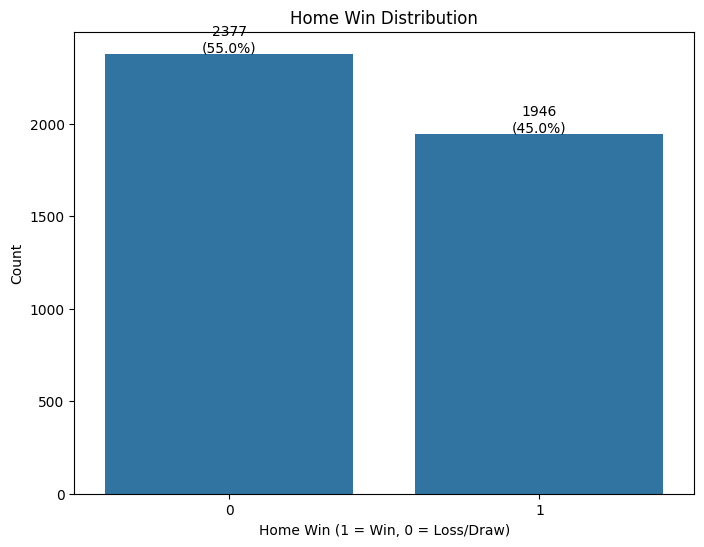

In [6]:
# Plot home win distribution with percentages
plt.figure(figsize=(8, 6))
sns.countplot(x='HomeWin', data=df)
plt.title('Home Win Distribution')
plt.xlabel('Home Win (1 = Win, 0 = Loss/Draw)')
plt.ylabel('Count')

# Add percentage labels
count_0 = (df['HomeWin'] == 0).sum()
pct_0 = count_0/len(df) * 100
plt.text(0, count_0 + 10, f'{count_0}\n({pct_0:.1f}%)', ha='center')

count_1 = (df['HomeWin'] == 1).sum() 
pct_1 = count_1/len(df) * 100
plt.text(1, count_1 + 10, f'{count_1}\n({pct_1:.1f}%)', ha='center')

plt.show()


In [7]:
# Moving average columns
ma_columns = ['m10_B365H_prob_home', 'm10_B365A_prob_away',
       'm5_HomeWin_home', 'm10_HomeWin_home',
       'm5_AwayWin_away', 'm10_AwayWin_away', 'm5_FTHG_home', 'm10_FTHG_home',
       'm5_FTAG_away', 'm10_FTAG_away', 'm5_FTAG_home', 'm10_FTAG_home',
       'm5_FTHG_away', 'm10_FTHG_away', 'm5_HS_home', 'm10_HS_home',
       'm5_AS_away', 'm10_AS_away', 'm5_HC_home', 'm10_HC_home', 'm5_AC_away',
       'm10_AC_away']

print(f"Total Moving Average columns: {len(ma_columns)}")


Total Moving Average columns: 22


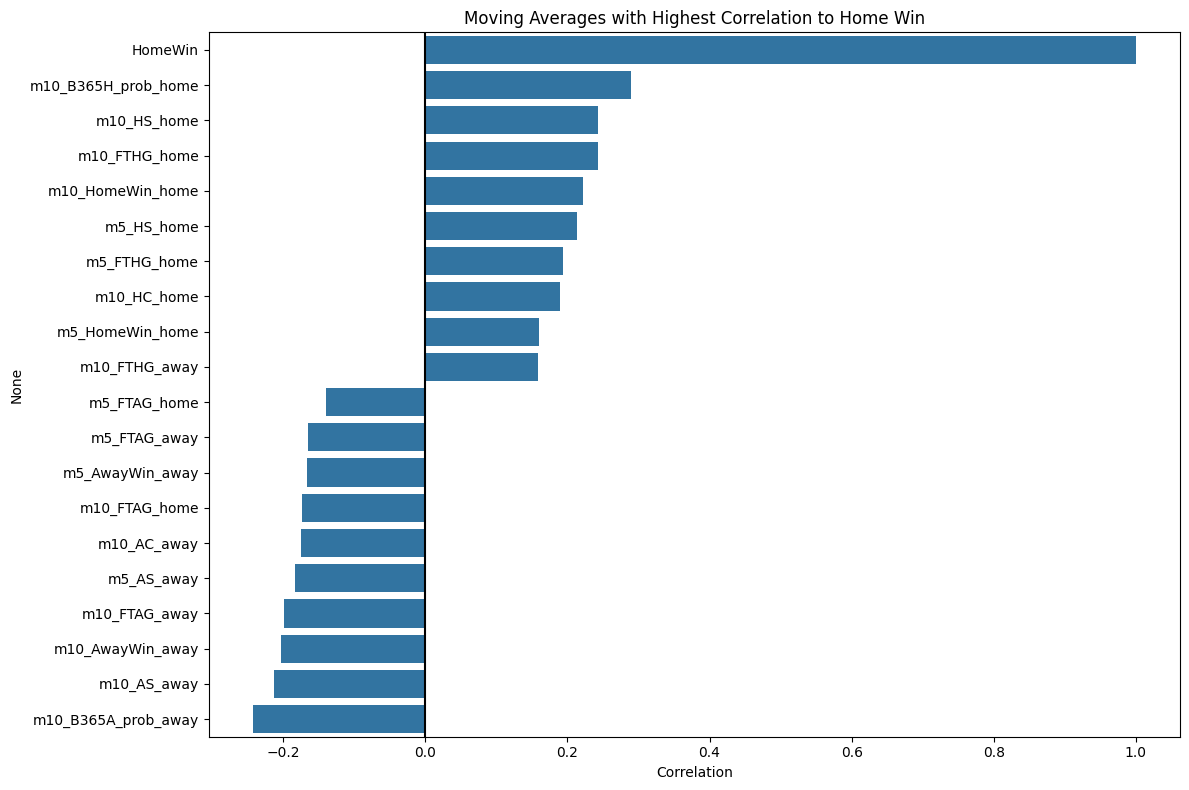

Top correlations with HomeWin:
HomeWin                1.000000
m10_B365H_prob_home    0.288852
                         ...   
m5_HomeWin_home        0.160291
m10_FTHG_away          0.158475
Name: HomeWin, Length: 10, dtype: float64

Bottom correlations with HomeWin:
m5_FTAG_home          -0.139742
m5_FTAG_away          -0.165802
                         ...   
m10_AS_away           -0.213350
m10_B365A_prob_away   -0.242697
Name: HomeWin, Length: 10, dtype: float64


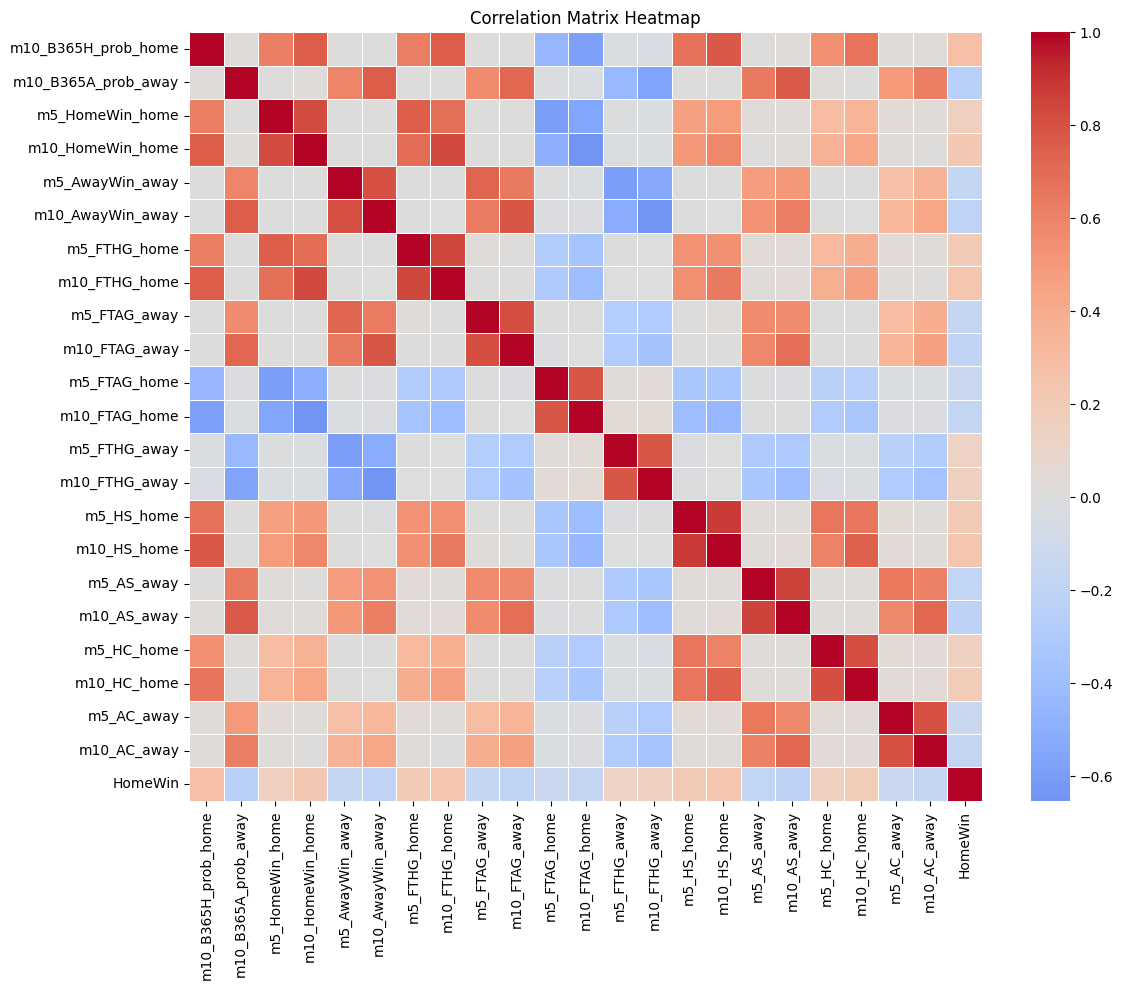

In [8]:
# Correlation between moving averages and target variable
ma_corr = df[ma_columns + ['HomeWin']].corr()['HomeWin'].sort_values(ascending=False)

# Display top positive and negative correlations
plt.figure(figsize=(12, 8))
top_corr = pd.concat([ma_corr.head(10), ma_corr.tail(10)])
sns.barplot(x=top_corr.values, y=top_corr.index)
plt.title('Moving Averages with Highest Correlation to Home Win')
plt.xlabel('Correlation')
plt.axvline(x=0, color='black', linestyle='-')
plt.tight_layout()
plt.show()

print("Top correlations with HomeWin:")
print(ma_corr.head(10))
print("\nBottom correlations with HomeWin:")
print(ma_corr.tail(10))

# Create and display correlation matrix heatmap
corr_matrix = df[ma_columns + ['HomeWin']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5, center=0, mask=corr_matrix.isnull())
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()


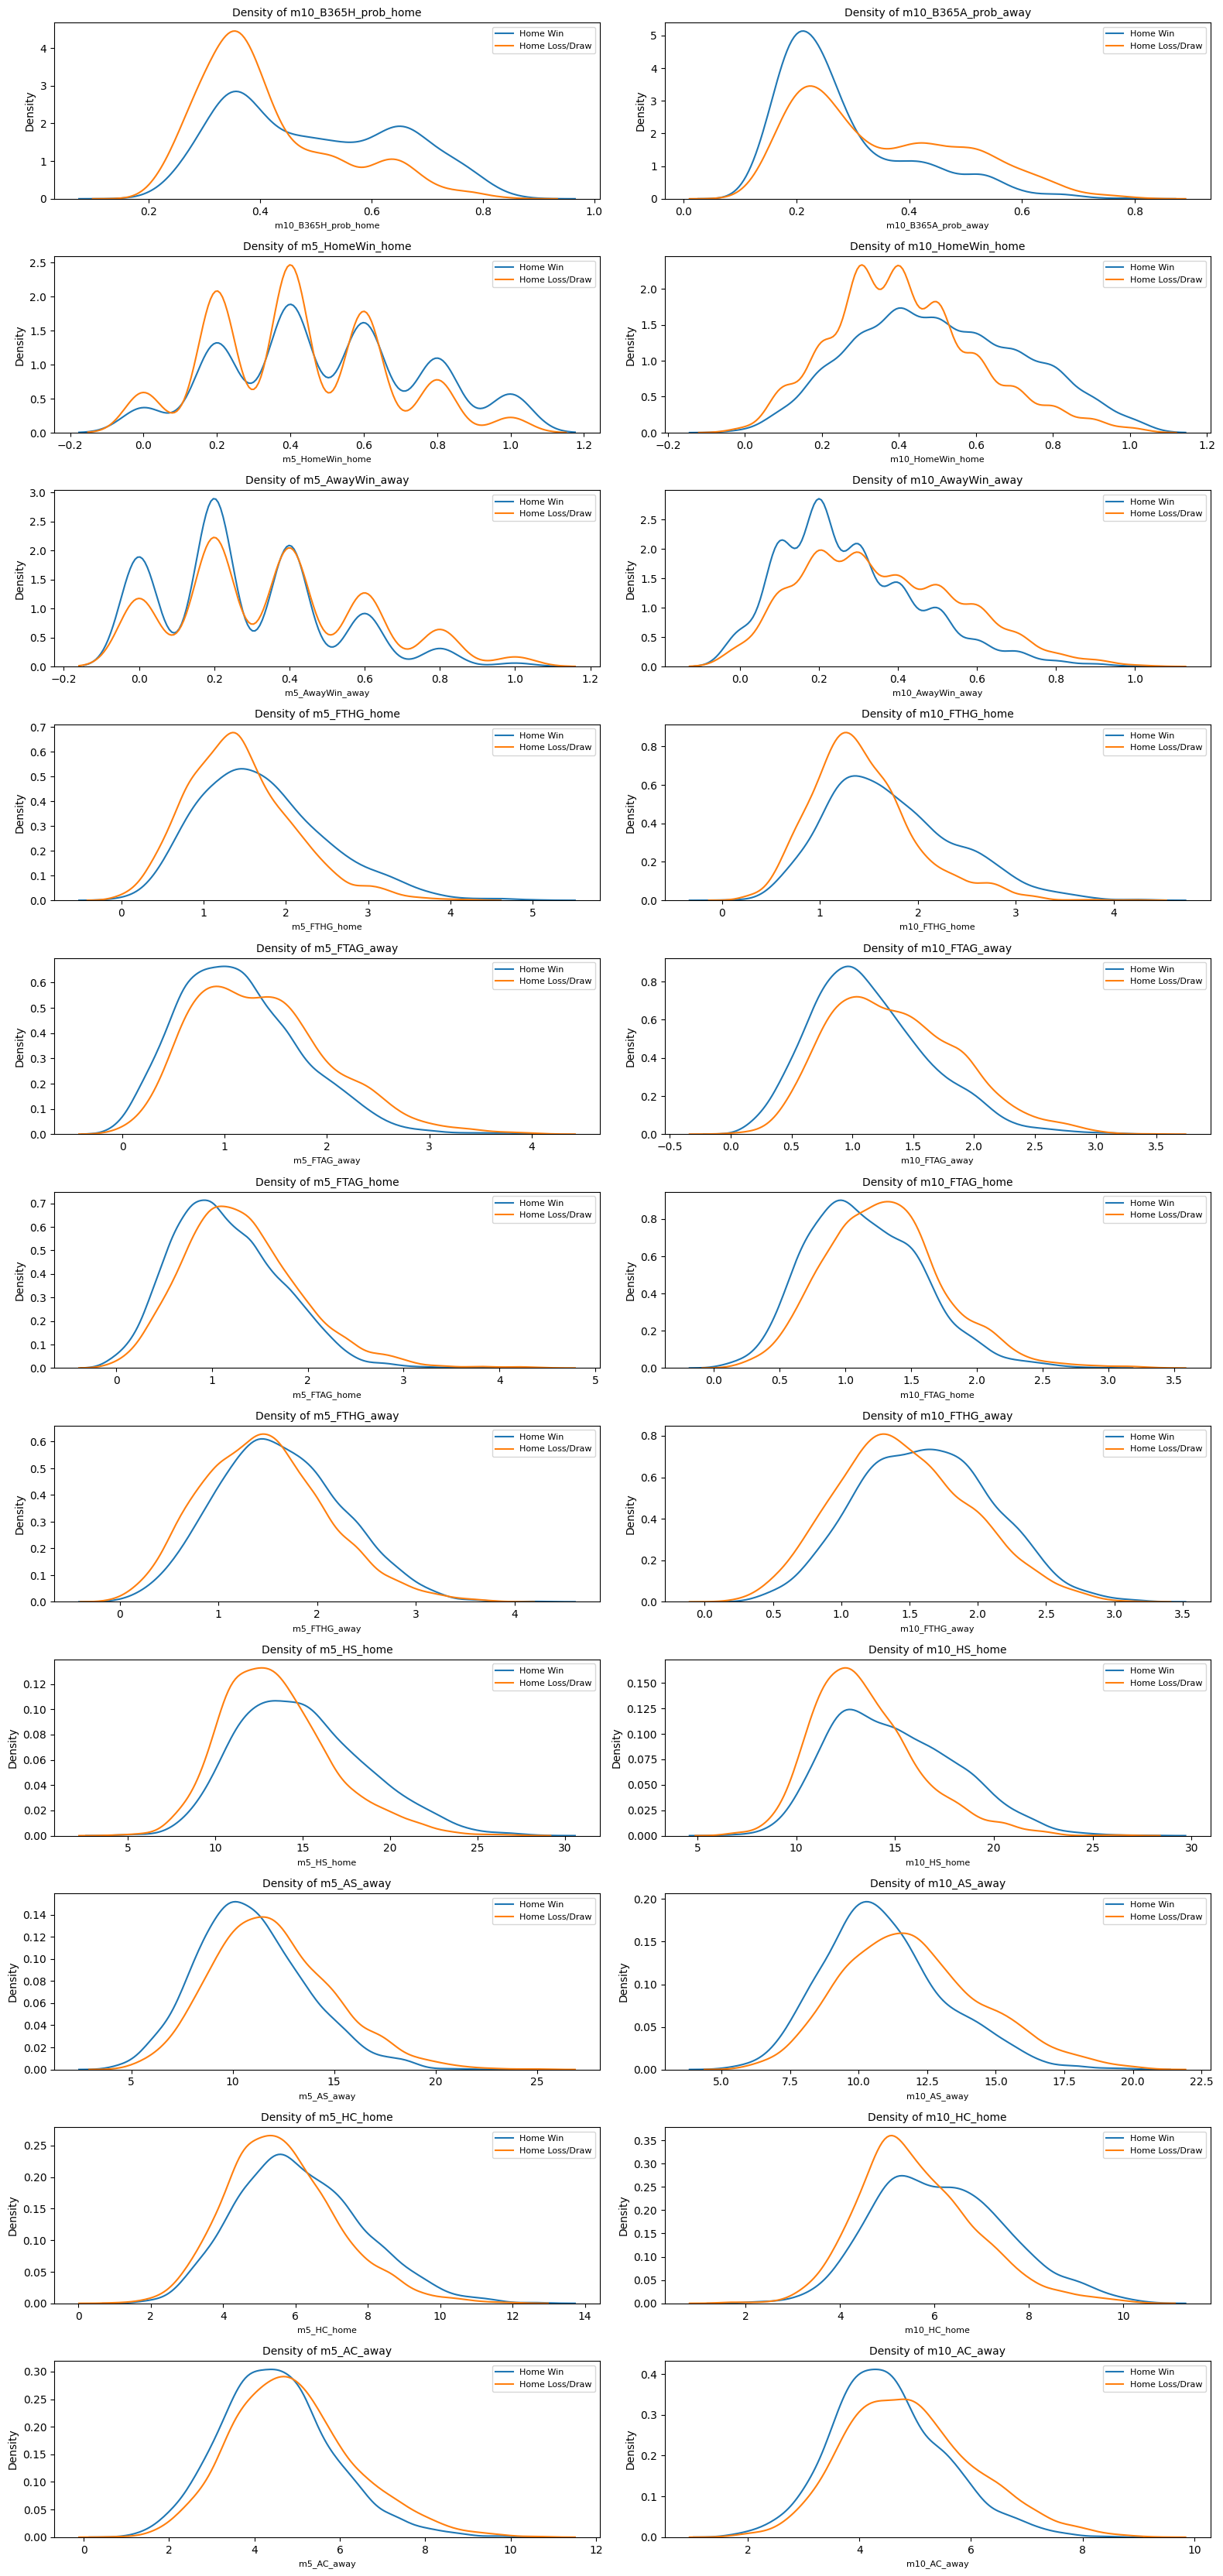

In [9]:
# Density plots comparing key moving averages for home wins vs losses
plt.figure(figsize=(16, 36))
for i, feature in enumerate(['m10_B365H_prob_home',
                           'm10_B365A_prob_away',
                           'm5_HomeWin_home', 'm10_HomeWin_home',
                           'm5_AwayWin_away', 'm10_AwayWin_away', 
                           'm5_FTHG_home', 'm10_FTHG_home',
                           'm5_FTAG_away', 'm10_FTAG_away',
                           'm5_FTAG_home', 'm10_FTAG_home',
                           'm5_FTHG_away', 'm10_FTHG_away',
                           'm5_HS_home', 'm10_HS_home',
                           'm5_AS_away', 'm10_AS_away',
                           'm5_HC_home', 'm10_HC_home',
                           'm5_AC_away', 'm10_AC_away']):
    plt.subplot(12, 2, i+1)
    sns.kdeplot(data=df[df['HomeWin']==1], x=feature, label='Home Win')
    sns.kdeplot(data=df[df['HomeWin']==0], x=feature, label='Home Loss/Draw')
    plt.title(f'Density of {feature}', fontsize=10)
    plt.xlabel(feature, fontsize=8)
    plt.legend(fontsize=8)
plt.tight_layout()
plt.show()


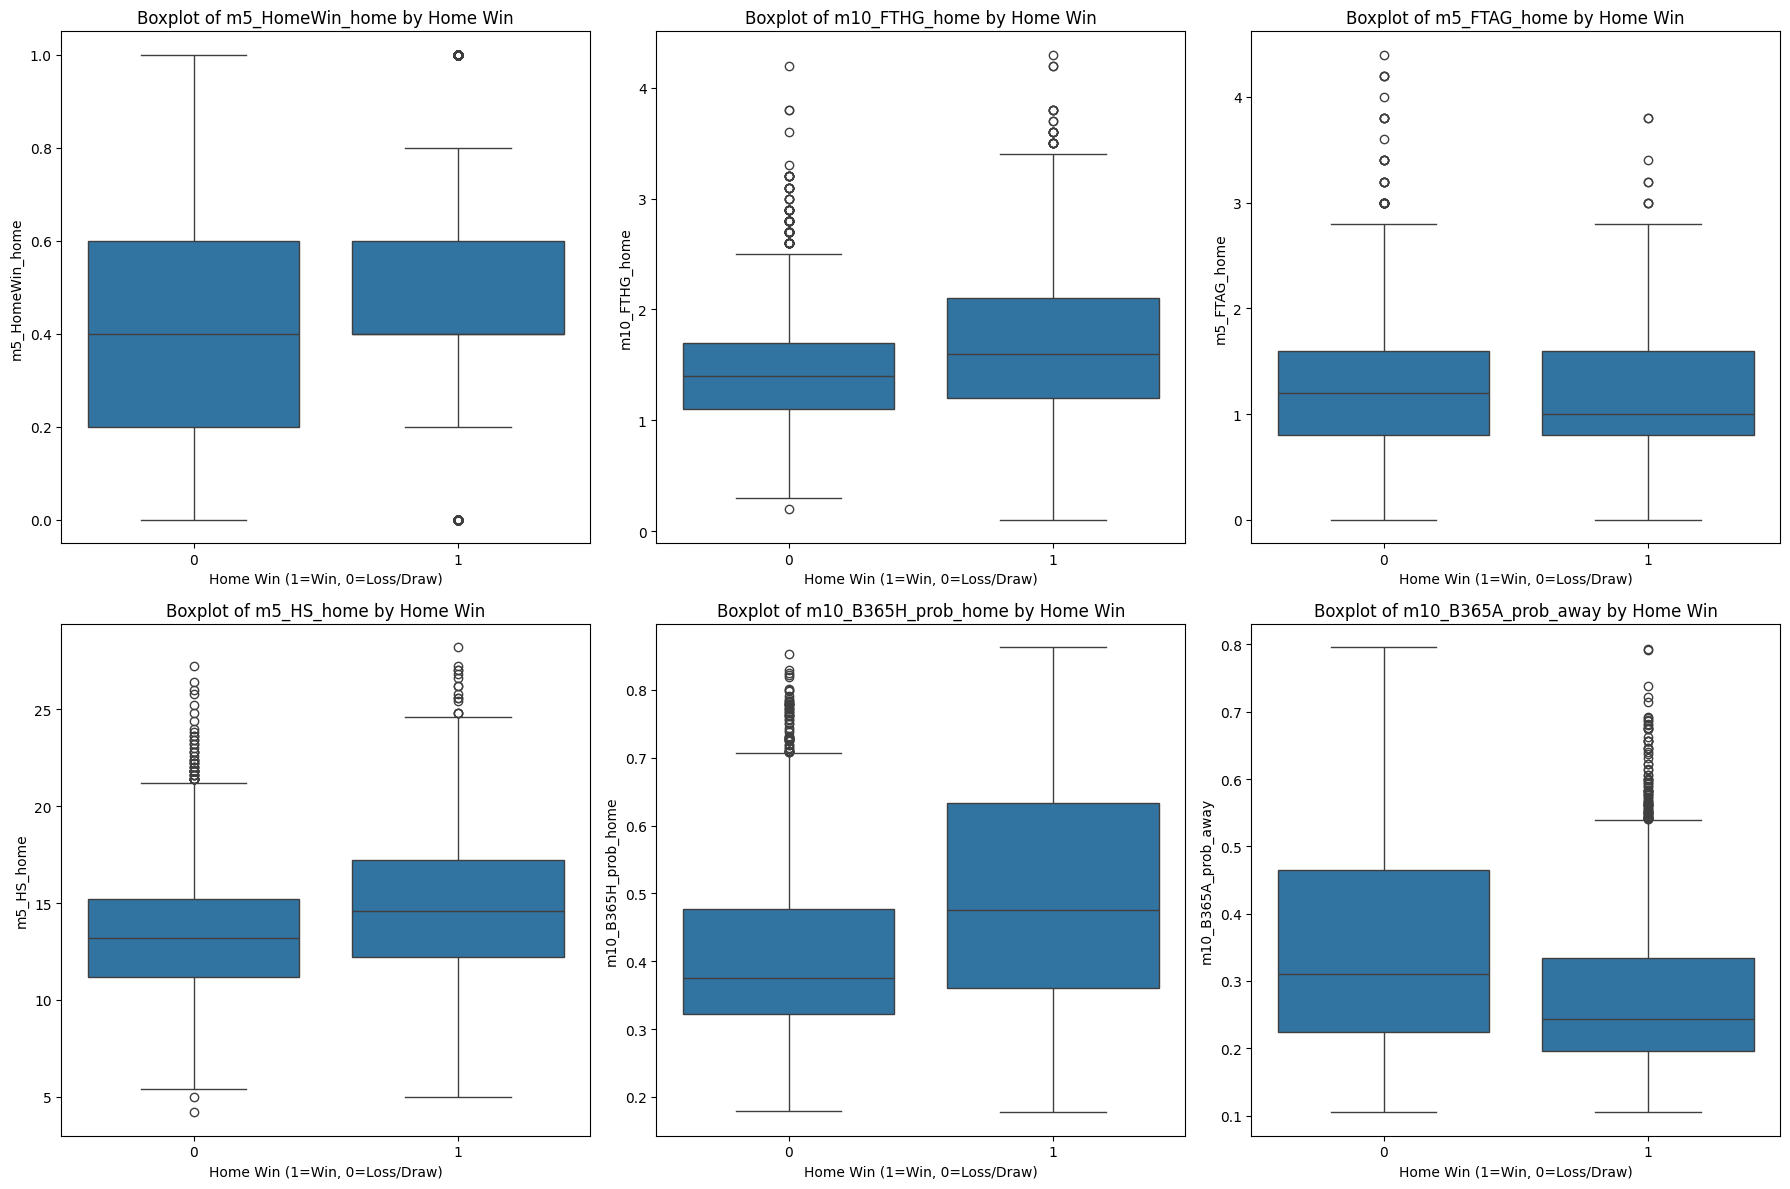

In [10]:
# Box plots of moving averages by match outcome
key_features = ['m5_HomeWin_home', 'm10_FTHG_home', 'm5_FTAG_home', 'm5_HS_home', 
               'm10_B365H_prob_home', 'm10_B365A_prob_away']

plt.figure(figsize=(18, 12))
for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='HomeWin', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Home Win')
    plt.xlabel('Home Win (1=Win, 0=Loss/Draw)')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()


### Principal Component Analysis (PCA)

We apply PCA to the moving average features (`ma_columns`) to reduce dimensionality. These features might be correlated, and PCA helps identify principal components (linear combinations of original features) that capture the most variance in the data in fewer dimensions. This can simplify subsequent modeling and analysis.


In [11]:
# Prepare the data for PCA
# Select the moving average columns
X = df[ma_columns].copy()


# Scale the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
# We don't specify n_components initially to see how much variance each component explains
pca = PCA()
pca_result = pca.fit_transform(X_scaled)

# Get the loadings (correlation between original features and PCs)
loadings = pca.components_

# Get the eigenvalues (variance explained by each PC)
eigenvalues = pca.explained_variance_

# Calculate proportion of explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

print("Eigenvalues (Variance explained by each PC):")
print(eigenvalues)
print("\nProportion of Variance Explained:")
print(explained_variance_ratio)
print("\nCumulative Proportion of Variance Explained:")
print(cumulative_variance_ratio)


Eigenvalues (Variance explained by each PC):
[6.63194546 6.24379006 1.62188174 1.55145074 1.208891   1.11186442
 0.48701479 0.47405426 0.42948684 0.39838193 0.26349385 0.2440898
 0.22765093 0.21926596 0.18510534 0.17818551 0.16942885 0.14295786
 0.06815035 0.06650164 0.04321111 0.03828778]

Proportion of Variance Explained:
[0.30138233 0.28374299 0.07370484 0.07050418 0.05493688 0.0505276
 0.02213192 0.02154294 0.01951761 0.01810408 0.01197422 0.01109242
 0.01034538 0.00996433 0.00841193 0.00809747 0.00769953 0.00649658
 0.00309703 0.0030221  0.00196369 0.00173995]

Cumulative Proportion of Variance Explained:
[0.30138233 0.58512532 0.65883017 0.72933434 0.78427122 0.83479882
 0.85693074 0.87847367 0.89799129 0.91609537 0.92806959 0.93916202
 0.94950739 0.95947172 0.96788365 0.97598112 0.98368065 0.99017723
 0.99327426 0.99629636 0.99826005 1.        ]


#### PCA Variance Explained

The scree plot shows the variance explained by each individual principal component, typically decreasing. The cumulative variance plot shows the total variance captured by including components up to a certain number. We often aim to retain enough components to explain a significant portion of the variance (e.g., 80-95%).


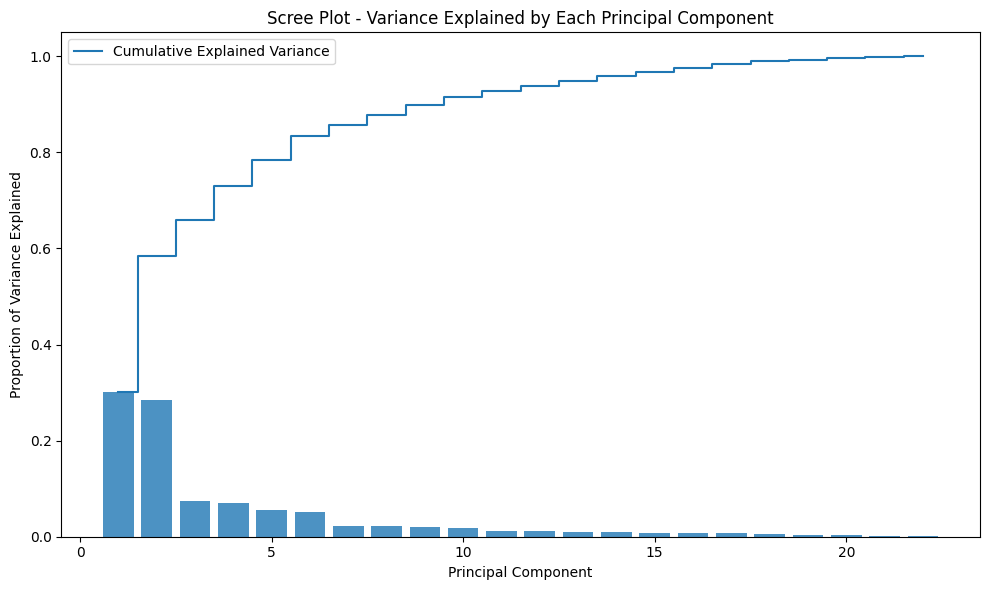

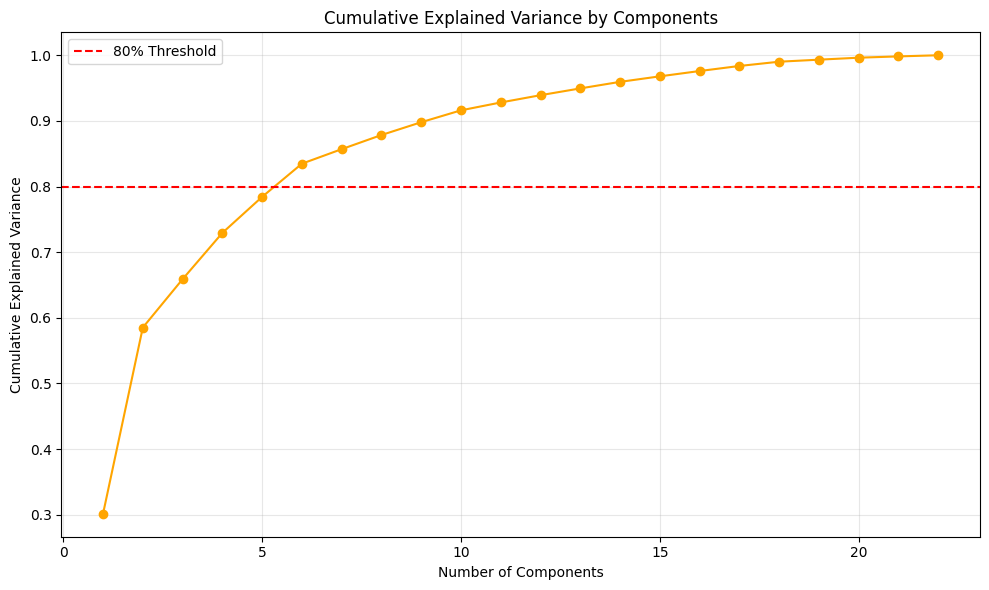

In [12]:
# Plot variance explained by each principal component
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.8)
plt.step(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, where='mid', label='Cumulative Explained Variance')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.title('Scree Plot - Variance Explained by Each Principal Component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Plot cumulative variance with threshold line
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio,
         marker='o', linestyle='-', color='orange')
# Common thresholds are 80% or 90%
threshold = 0.80
plt.axhline(y=threshold, color='r', linestyle='--', label=f'{threshold*100:.0f}% Threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Components')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


#### PCA Loadings & Biplots

Loadings indicate how strongly each original feature influences each principal component. Biplots attempt to visualize both the principal component scores (data points projected onto the PCs) and the loadings (feature vectors) simultaneously. This helps understand the relationship between original features and the principal components, and how data points are distributed in the reduced dimensional space.

*Note: Biplots with many features can become cluttered. Loadings plots are sometimes clearer for interpreting feature contributions.*


In [13]:
# Create a DataFrame with the loadings for the first 3 PCs for inspection
# (Adjust the number of PCs shown if desired)
n_pcs_to_show = 3
loadings_df = pd.DataFrame(
    data=loadings[:n_pcs_to_show, :].T,  # Transpose to get features as rows
    columns=[f'PC{i+1}' for i in range(n_pcs_to_show)],
    index=ma_columns
)
print(f"Loadings for the first {n_pcs_to_show} Principal Components:")
print(loadings_df)


Loadings for the first 3 Principal Components:
                          PC1       PC2       PC3
m10_B365H_prob_home  0.285479 -0.204356  0.028314
m10_B365A_prob_away  0.198187  0.282293  0.000643
...                       ...       ...       ...
m5_AC_away           0.151626  0.196393  0.189418
m10_AC_away          0.169742  0.229897  0.165550

[22 rows x 3 columns]


#### Selecting Number of Components & Creating PCA Features

Based on the cumulative explained variance plot, we select the number of components that meet our desired threshold (e.g., 80%). We then create a new DataFrame containing these principal components, which will be used as features for the subsequent clustering step.


In [14]:
# Find which components explain at least 80% of variance
threshold = 0.80
n_components_optimal = np.argmax(cumulative_variance_ratio >= threshold) + 1
print(f"Number of components needed to explain {threshold*100:.0f}% of variance: {n_components_optimal}")

# Let's see how much variance the selected components explain
print(f"Total variance explained by first {n_components_optimal} components: {cumulative_variance_ratio[n_components_optimal-1]*100:.2f}%")

# Use the PCA transformed data with the selected number of components
pca_features = pd.DataFrame(
    pca_result[:, :n_components_optimal],
    columns=[f'PC{i+1}' for i in range(n_components_optimal)],
    index=df.index # Ensure index alignment
)

# Add the PCA components to the original dataframe (optional, but can be useful)
for col in pca_features.columns:
    df[col] = pca_features[col]

print(f"\nPCA features created: {pca_features.columns.tolist()}")
print("First 5 rows of PCA features:")
print(pca_features.head())


Number of components needed to explain 80% of variance: 6
Total variance explained by first 6 components: 83.48%

PCA features created: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']
First 5 rows of PCA features:
        PC1       PC2       PC3       PC4       PC5       PC6
0  1.280939 -4.097524 -0.410465 -2.838076 -1.457851  1.003569
1  0.760815  2.308248 -0.100491 -0.129038 -1.457542 -0.489252
2 -1.993097 -2.109667  1.544289  0.128043  1.280771 -0.651551
3  0.178335 -3.470913  1.088758  0.269698 -1.572776 -0.842450
4 -0.827802 -2.330502 -1.071806  1.169976 -0.095853 -1.262997


In [15]:
df.to_excel("df_after_pca.xlsx",index=False)
df.to_csv("df_after_pca.csv",index=False, sep=';')


## Cluster Analysis using K-means on PCA Components

Now we perform K-means clustering to group matches based on their characteristics represented by the principal components. Using PCA components as input for clustering has the advantage that the features are uncorrelated and capture the most variance.


In [16]:
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


### Determining the Optimal Number of Clusters (k)

Before applying K-means, we need to determine a suitable number of clusters (`k`). Two common methods are:
1.  **Elbow Method:** Plot the Within-Cluster Sum of Squares (WCSS or inertia) for different values of `k`. The "elbow" point, where the rate of decrease in WCSS sharply slows down, suggests a good `k`.
2.  **Silhouette Score:** Measures how similar an object is to its own cluster compared to other clusters. Scores range from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. We look for the `k` that maximizes the average silhouette score.

We will calculate both metrics for a range of `k` values.


Calculating Inertia and Silhouette Scores for different k...
  k=2: Inertia = 59647.30, Silhouette Score = 0.2476
  k=3: Inertia = 45201.09, Silhouette Score = 0.2538
  k=4: Inertia = 40988.77, Silhouette Score = 0.2206
  k=5: Inertia = 37806.48, Silhouette Score = 0.1752
  k=6: Inertia = 35347.27, Silhouette Score = 0.1667
  k=7: Inertia = 33812.32, Silhouette Score = 0.1517
  k=8: Inertia = 32572.75, Silhouette Score = 0.1455
  k=9: Inertia = 31367.51, Silhouette Score = 0.1360
  k=10: Inertia = 30254.44, Silhouette Score = 0.1352


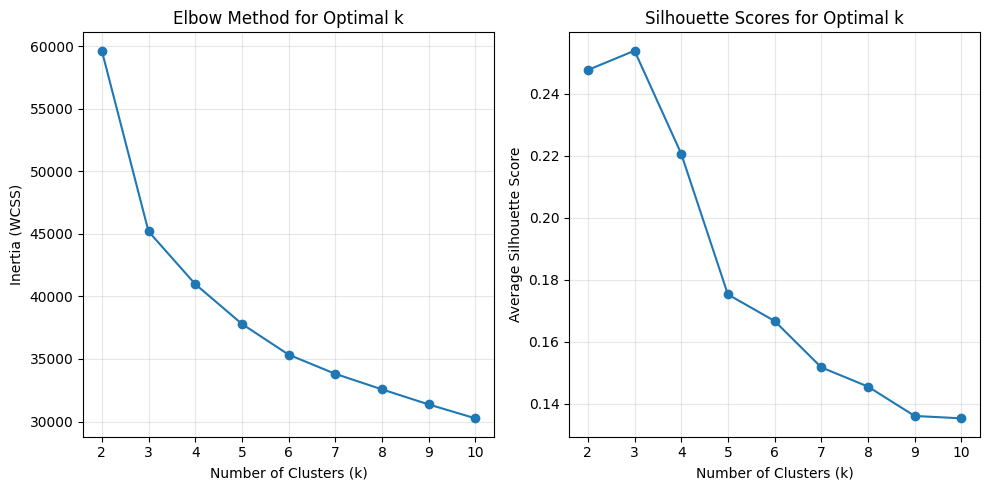

In [17]:
# Select features for clustering: Use the PCA components
X_cluster = pca_features.copy()

# --- Determine Optimal K ---
k_range = range(2, 11) # Explore k from 2 to 10
inertia_values = []
silhouette_scores = []

print("Calculating Inertia and Silhouette Scores for different k...")
for k in k_range:
    kmeans_k = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels_k = kmeans_k.fit_predict(X_cluster)
    
    inertia = kmeans_k.inertia_
    inertia_values.append(inertia)
    
    silhouette_avg = silhouette_score(X_cluster, cluster_labels_k)
    silhouette_scores.append(silhouette_avg)
    print(f"  k={k}: Inertia = {inertia:.2f}, Silhouette Score = {silhouette_avg:.4f}")

# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True, alpha=0.3)

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Scores for Optimal k')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### Selecting k and Performing K-means

Based on the Elbow plot (looking for the "bend") and the Silhouette plot (looking for the peak), we choose an optimal `k`. For instance, if the elbow appears at `k=3` and the silhouette score is also highest or near-highest at `k=3`, we select `k=3`.


In [18]:
# --- Apply K-means with the chosen optimal K ---
# !! Choose optimal_k based on the plots above !!
optimal_k = 3 # Example: Set based on visual inspection of plots
print(f"Selected optimal number of clusters: k = {optimal_k}")

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_cluster)

# The cluster centers are in the PCA component space
cluster_centers_pca = kmeans.cluster_centers_

# --- Analyze Clusters ---

# Calculate win rates for each cluster to potentially reorder them for interpretation
temp_df = pd.DataFrame({'cluster': cluster_labels, 'HomeWin': df['HomeWin']})
win_rates = temp_df.groupby('cluster')['HomeWin'].mean().sort_values(ascending=False)

# Create a mapping to reorder clusters by win rate (highest first)
cluster_mapping = {old_idx: rank for rank, old_idx in enumerate(win_rates.index)}
remapped_labels = np.array([cluster_mapping[label] for label in cluster_labels])

# Add remapped cluster labels to the original dataframe
df['cluster'] = remapped_labels

# Get reordered win rates
cluster_win_rates = df.groupby('cluster')['HomeWin'].mean()
print("\nAverage Home Win Rate by Cluster (Reordered):")
print(cluster_win_rates)

# Get reordered cluster centers (still in PCA space)
reordered_centers_pca = np.zeros_like(cluster_centers_pca)
for old_idx, new_idx in cluster_mapping.items():
    reordered_centers_pca[new_idx] = cluster_centers_pca[old_idx]

cluster_centers_df = pd.DataFrame(
    reordered_centers_pca,
    columns=X_cluster.columns, # Columns are PC1, PC2, ...
    index=[f'Cluster {i}' for i in range(optimal_k)]
)
print("\nCluster Centers (in PCA Component Space, Reordered by Win Rate):")
print(cluster_centers_df)


Selected optimal number of clusters: k = 3

Average Home Win Rate by Cluster (Reordered):
cluster
0    0.669442
1    0.438426
2    0.243777
Name: HomeWin, dtype: float64

Cluster Centers (in PCA Component Space, Reordered by Win Rate):
                PC1       PC2       PC3       PC4       PC5       PC6
Cluster 0  2.297173 -2.347437  0.038307 -0.037505  0.045885  0.082147
Cluster 1 -2.152127 -0.320624  0.006396  0.008887 -0.041130 -0.000894
Cluster 2  1.238315  2.950147 -0.050089  0.023697  0.021628 -0.082973


### Visualizing Clusters

We visualize the clusters using a scatter plot of the first two principal components (PC1 vs PC2), as these capture the most variance. Each point represents a match, colored by its assigned cluster. The cluster centers are marked, and annotated with their average home win rate. This helps understand the separation and characteristics of the identified groups.


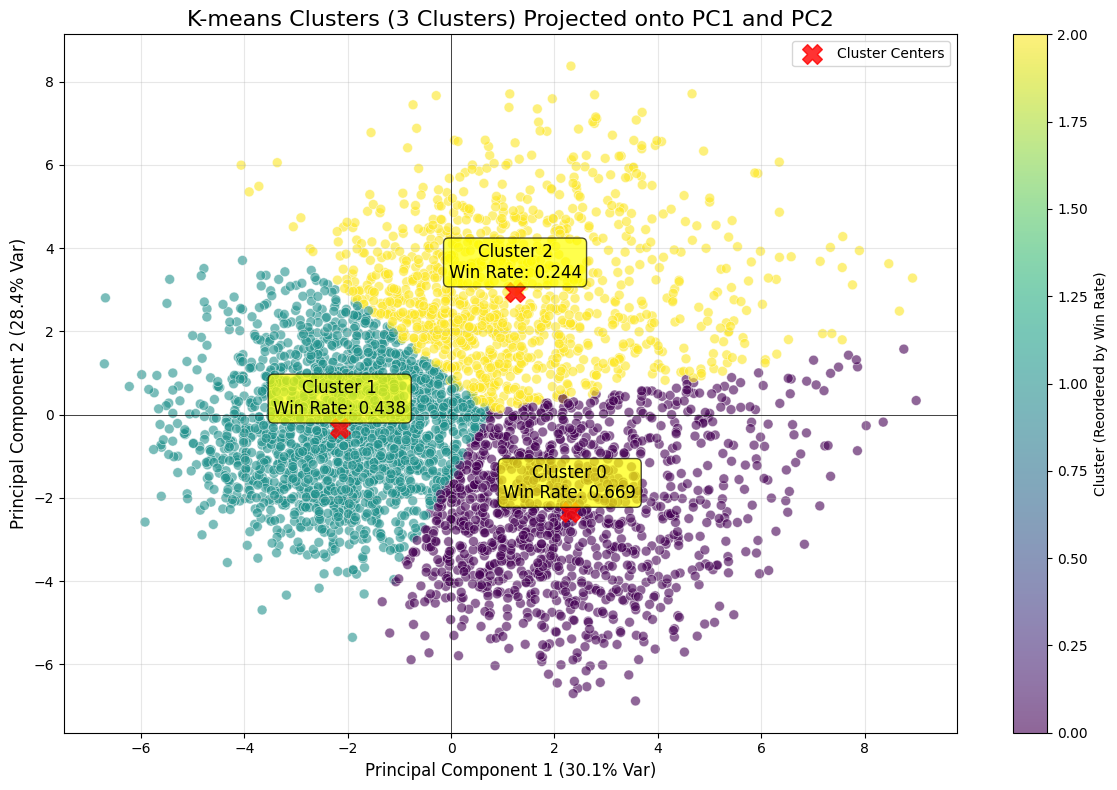

In [19]:
# Create a scatter plot using the first two PCA components
plt.figure(figsize=(12, 8))
pc1_col = 'PC1'
pc2_col = 'PC2'

scatter = plt.scatter(X_cluster[pc1_col], X_cluster[pc2_col], c=remapped_labels, cmap='viridis',
                      alpha=0.6, s=50, edgecolors='w', linewidth=0.5)

# Add reordered cluster centers
plt.scatter(reordered_centers_pca[:, 0], reordered_centers_pca[:, 1], c='red', s=200, alpha=0.8, marker='X', label='Cluster Centers')

# Add win rate annotations to cluster centers
for i, center in enumerate(reordered_centers_pca):
    plt.annotate(f"Cluster {i}\nWin Rate: {cluster_win_rates[i]:.3f}",
                 (center[0], center[1]),
                 textcoords="offset points",
                 xytext=(0,10), # Offset text slightly above center
                 ha='center',
                 fontsize=12,
                 bbox=dict(boxstyle="round,pad=0.3", fc='yellow', alpha=0.7))

plt.title(f'K-means Clusters ({optimal_k} Clusters) Projected onto PC1 and PC2', fontsize=16)
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.1f}% Var)', fontsize=12)
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.1f}% Var)', fontsize=12)
plt.colorbar(scatter, label='Cluster (Reordered by Win Rate)')
plt.grid(True, alpha=0.3)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


### Cluster Composition: Team-Season Analysis

To understand which types of teams/seasons fall into which clusters, we analyze the distribution of `TeamSeason` identifiers across the clusters. We create a heatmap showing the number of matches each team-season played that were assigned to each cluster. We focus on the top N teams most frequently appearing in the cluster with the highest win rate (Cluster 0) for clarity.



Top 10 Team-Season Occurrences in Each Cluster (Sorted by Cluster 0):
                       Cluster 0  Cluster 1  Cluster 2
TeamSeason                                            
Tottenham - 2016/2017         19          0          0
Man City - 2021/2022          19          0          0
...                          ...        ...        ...
Man City - 2023/2024          18          0          1
Liverpool - 2019/2020         18          0          1

[10 rows x 3 columns]


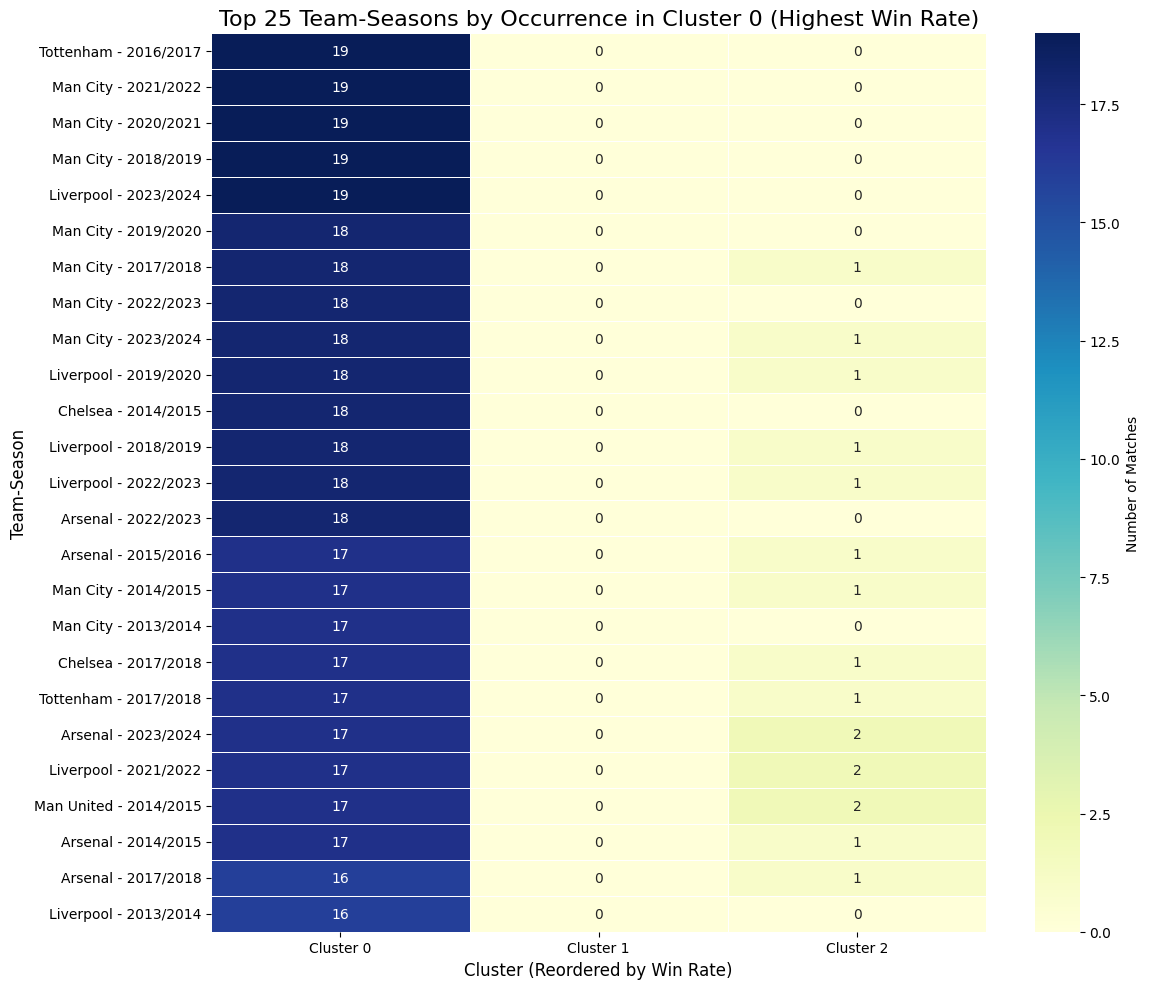

In [20]:
# Create a team-season identifier
df['TeamSeason'] = df['HomeTeam'] + ' - ' + df['Season']

# Count occurrences of each team-season in each reordered cluster
team_season_cluster_counts = pd.crosstab(df['TeamSeason'], df['cluster'])

# Rename columns for clarity based on reordered labels
team_season_cluster_counts.columns = [f'Cluster {i}' for i in range(optimal_k)]

# Sort by occurrence in Cluster 0 (highest win rate cluster)
team_season_cluster_counts = team_season_cluster_counts.sort_values(by='Cluster 0', ascending=False)

# Display the table (optional, can be large)
print(f"\nTop 10 Team-Season Occurrences in Each Cluster (Sorted by Cluster 0):")
print(team_season_cluster_counts.head(10))

# --- Improved Heatmap Visualization ---
# Select top N teams for the heatmap to avoid clutter
top_n_teams = 25 # Adjust N as needed
heatmap_data = team_season_cluster_counts.head(top_n_teams)

plt.figure(figsize=(12, 10)) # Adjust size as needed
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5, cbar_kws={'label': 'Number of Matches'})
plt.title(f'Top {top_n_teams} Team-Seasons by Occurrence in Cluster 0 (Highest Win Rate)', fontsize=16)
plt.ylabel('Team-Season', fontsize=12)
plt.xlabel('Cluster (Reordered by Win Rate)', fontsize=12)
plt.yticks(rotation=0) # Keep y-axis labels horizontal
plt.tight_layout()
plt.show()


### Interpretation of Clusters

*   **Cluster 0 (Highest Win Rate):** Matches in this cluster correspond to situations strongly favoring a home win. The heatmap shows which team-seasons most frequently represent these favorable home conditions. These might be dominant teams during specific seasons.
*   **Cluster 1 (Medium Win Rate):** Represents matches with more moderate or mixed indicators for home performance.
*   **Cluster 2 (Lowest Win Rate):** Matches in this cluster likely represent situations where the home team is less favored, potentially facing strong away teams or being in poor form according to the principal components derived from moving averages.

Further analysis could involve examining the average values of the original `ma_columns` features (or the principal component centers) for each cluster to understand the specific statistical profiles distinguishing them.
